### Nama : Muhammad Iswari
### NIM : H071221007

## 1. Seleksi Unvariate

In [1]:
# import library
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [50]:
# memuat data
data = pd.read_csv("/content/Heart_disease_cleveland_new.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [8]:
# memilih data yang dibutuhkan
X = data.iloc[:,0:20]  #independent colums
y = data.iloc[:,-1]    # target colum i.e price range

In [9]:
# menerapkan SelectKBest untuk melakukan ekstraksi
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [10]:
dfscores

,0
0,22.562319
1,7.432845
2,22.154638
3,16.159096
4,23.802935
5,0.164669
6,8.644897
7,183.821471
8,38.052613
9,70.572550


In [11]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

      Specs       Score
7   thalach  183.821471
13   target  164.000000
11       ca   84.115181
9   oldpeak   70.572550
12     thal   40.163658
8     exang   38.052613
4      chol   23.802935
0       age   22.562319
2        cp   22.154638
10    slope   21.968672


## 2. Feature Importance

In [16]:
# import library
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [19]:
# memuat data
data = pd.read_csv("/content/Heart_disease_cleveland_new.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [20]:
# melakukan ExtraTreesClassifier untuk mengekstraksi fitur
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.01326879 0.02076557 0.03151574 0.01090351 0.00850129 0.00531597
 0.00805416 0.02084758 0.05758222 0.02226343 0.02941929 0.05063521
 0.07999757 0.64092967]


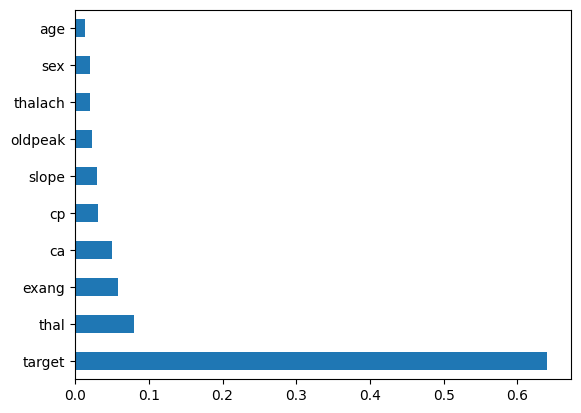

In [21]:
# melakukan plot dari feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## 3. Matriks Korelasi dengan Heatmap

In [27]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns

In [47]:
# memuat data
data = pd.read_csv("/content/Heart_disease_cleveland_new.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [48]:
# mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = data.corr()
top_corr_features = corrmat.index

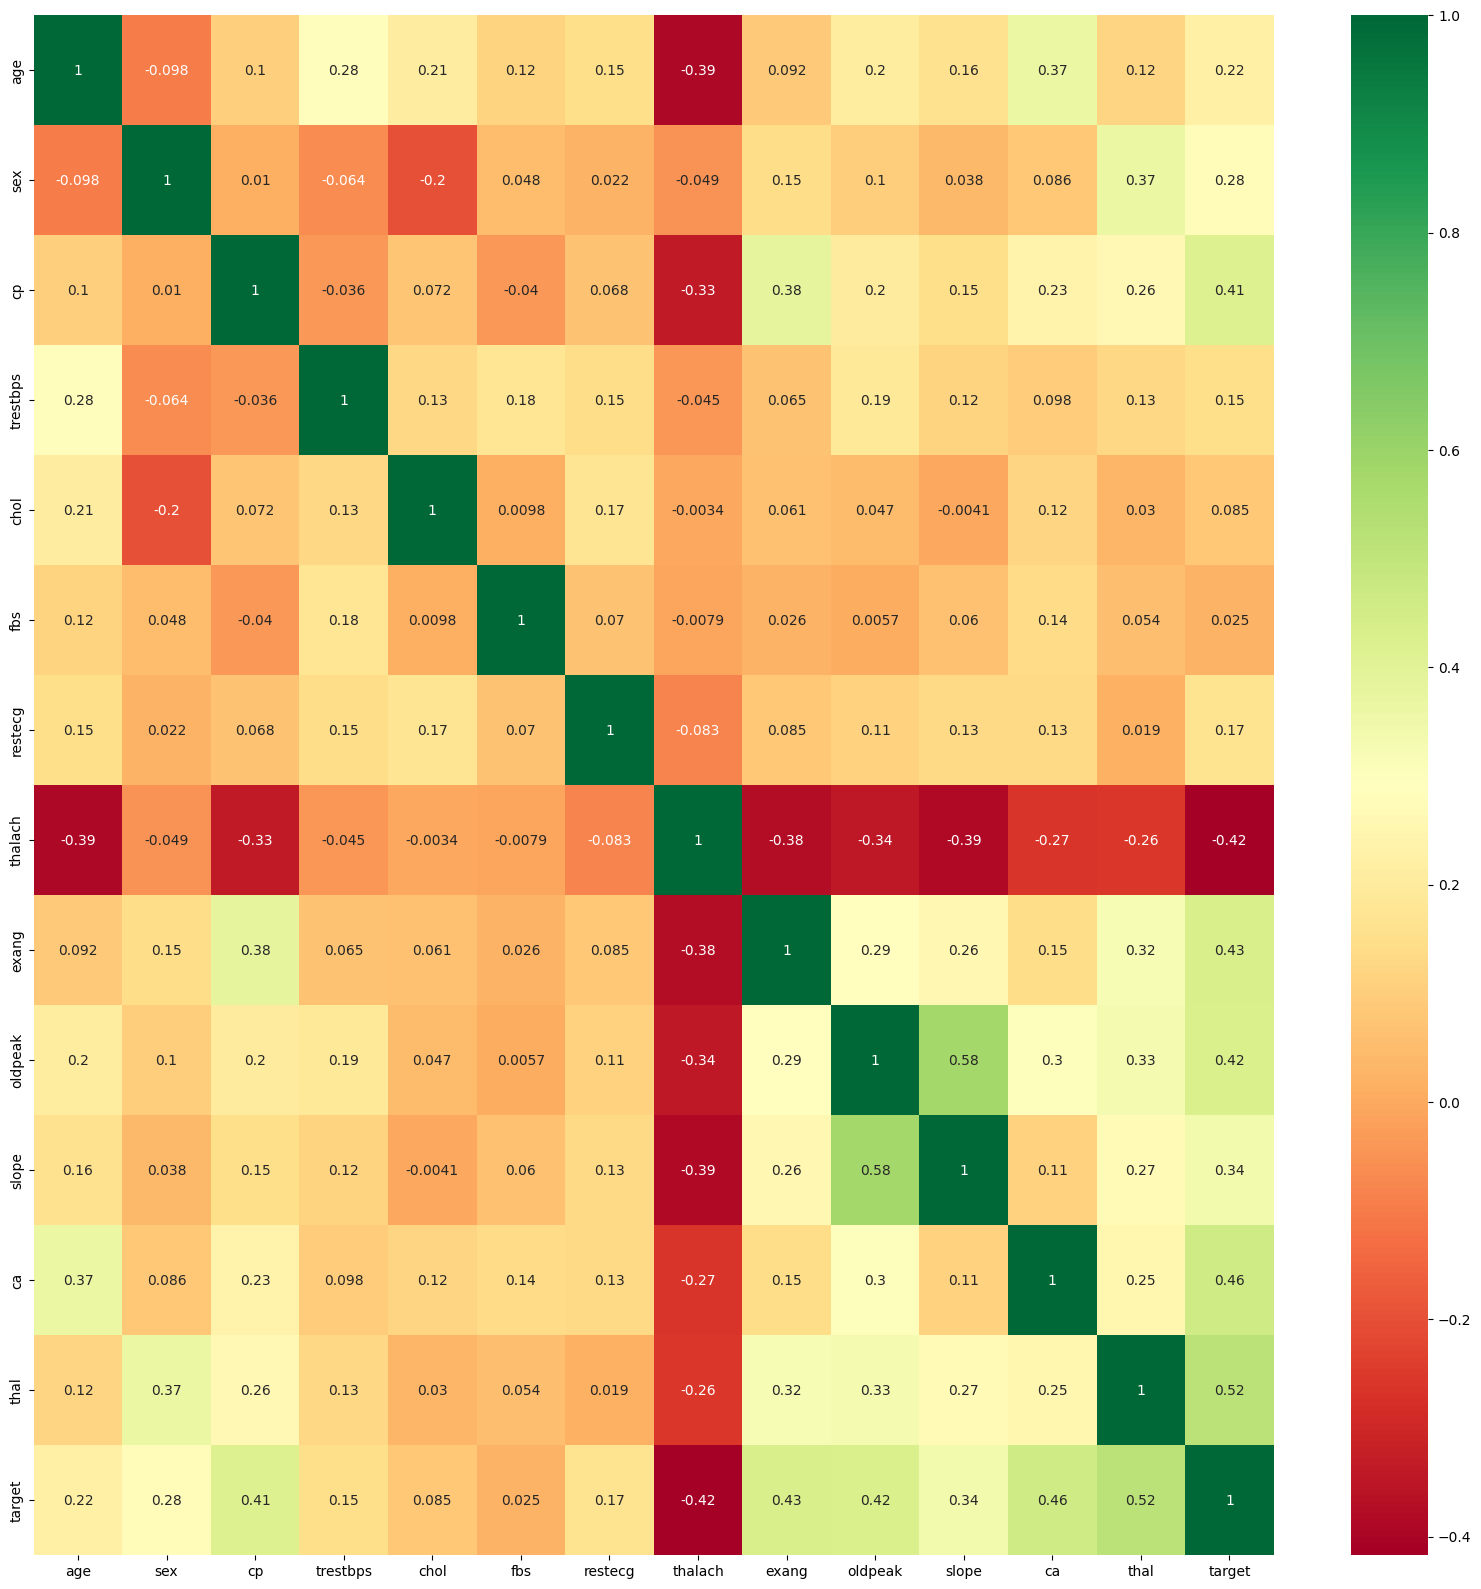

In [49]:
# plot heatmap
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Kesimpulan
*   Variabel oldpeak mimiliki korelasi yang cukup kuat dengan slope. Begitu pula dengan variabel thal dan target yang juga memiliki korelasi kuat.
*   Variabel thalach memiliki korelasi yang cukup lemah dengan target.

